![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy.stats as st

In [96]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [97]:
columns2 = []
for col in data.columns:
    columns2.append(re.sub(" ","_", col).lower())
data.columns = columns2

In [98]:
categorical_df = data.select_dtypes(object)

In [99]:
categorical_df_num = categorical_df.drop(columns =['effective_to_date','customer','state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status'])
categorical_df_rest = categorical_df[['state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status']]

In [100]:
categorical_df_num

,response,coverage,gender,policy,renew_offer_type,vehicle_size
0,No,Basic,F,Corporate L3,Offer1,Medsize
1,No,Extended,F,Personal L3,Offer3,Medsize
2,No,Premium,F,Personal L3,Offer1,Medsize
3,No,Basic,M,Corporate L2,Offer1,Medsize
4,No,Basic,M,Personal L1,Offer1,Medsize
...,...,...,...,...,...,...
9129,No,Basic,M,Personal L1,Offer2,Medsize
9130,Yes,Extended,F,Corporate L3,Offer1,Medsize
9131,No,Extended,M,Corporate L2,Offer1,Medsize
9132,No,Extended,M,Personal L2,Offer3,Large


2. Plot all the categorical variables with the proper plot. What can you see?


In [101]:
sns.set(rc={'figure.figsize':(13,5)})

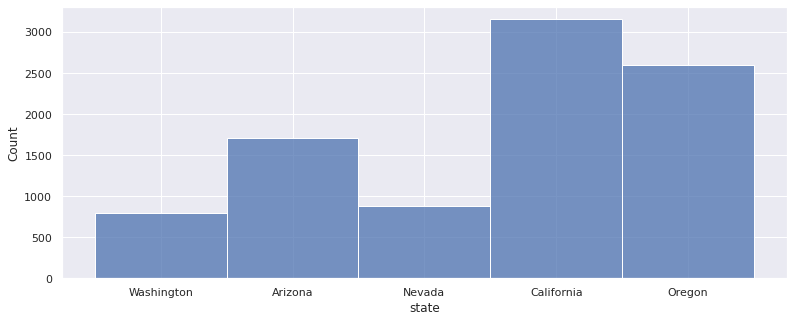

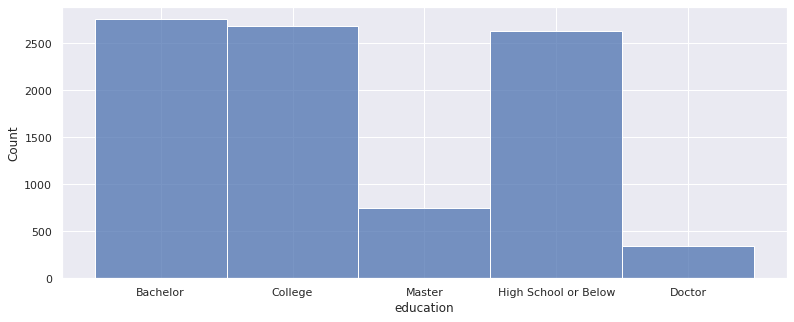

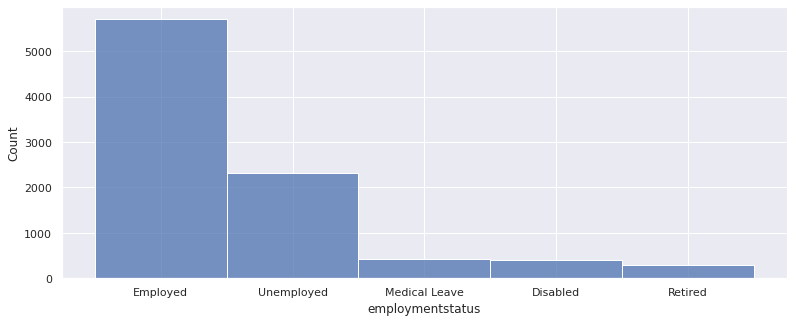

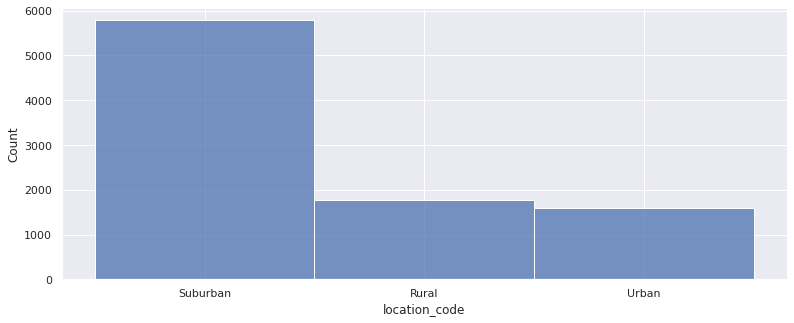

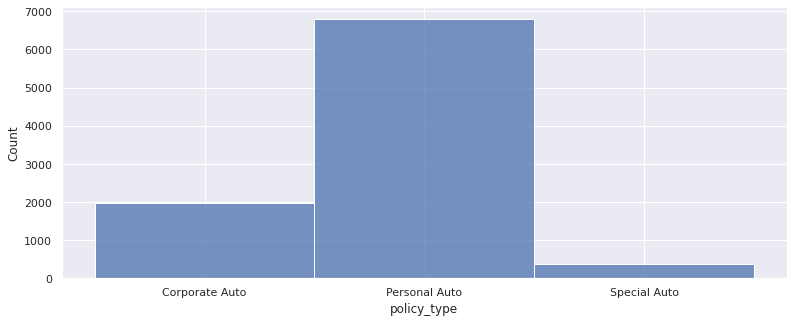

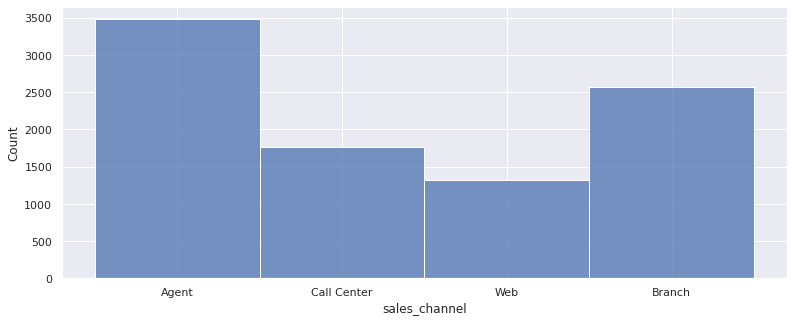

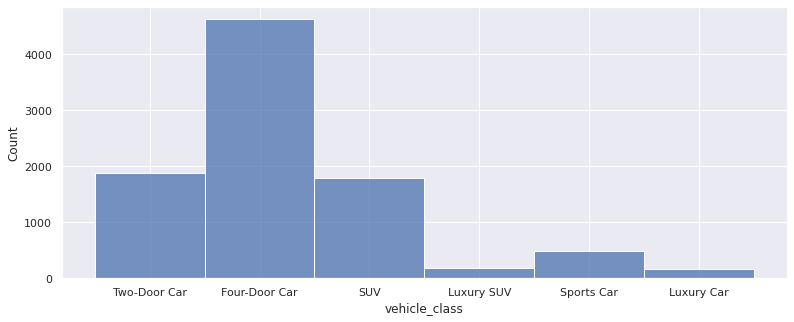

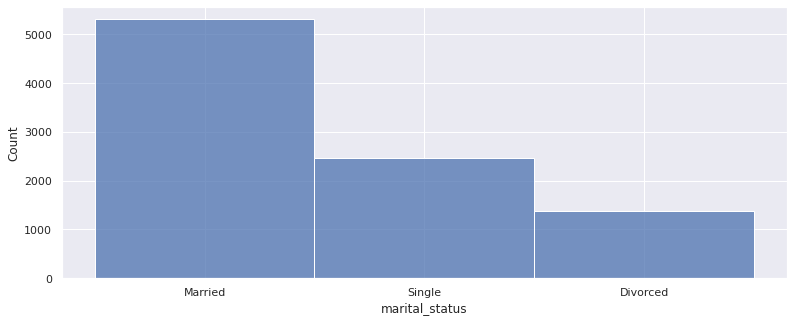

In [102]:
for col in categorical_df_rest.columns:
    sns.histplot(categorical_df_rest[col])
    plt.show()

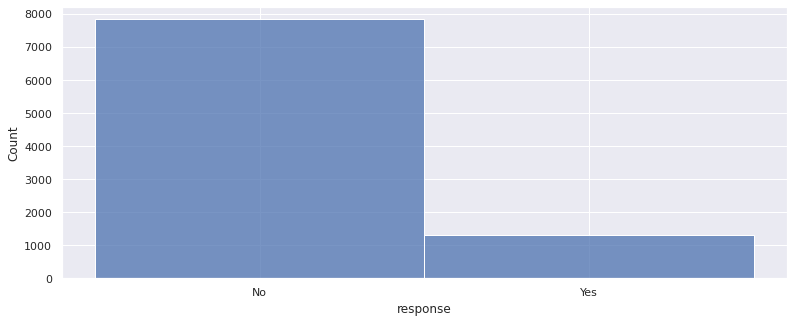

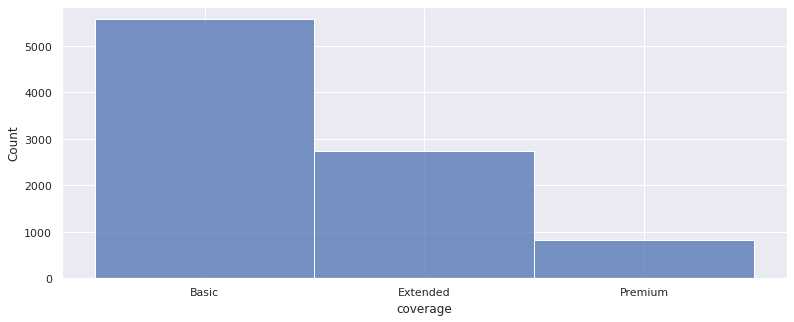

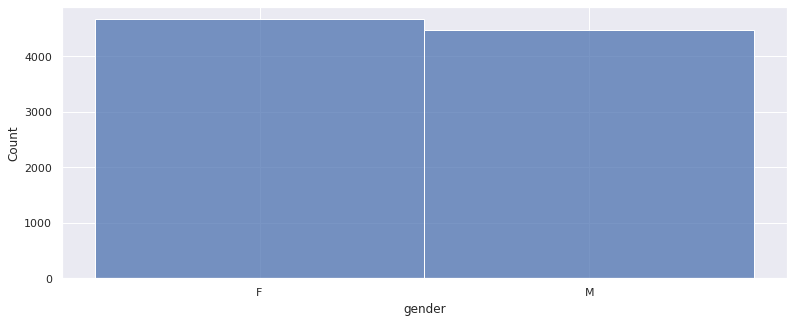

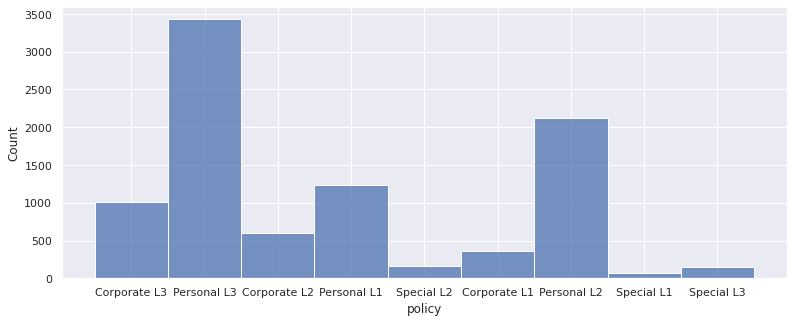

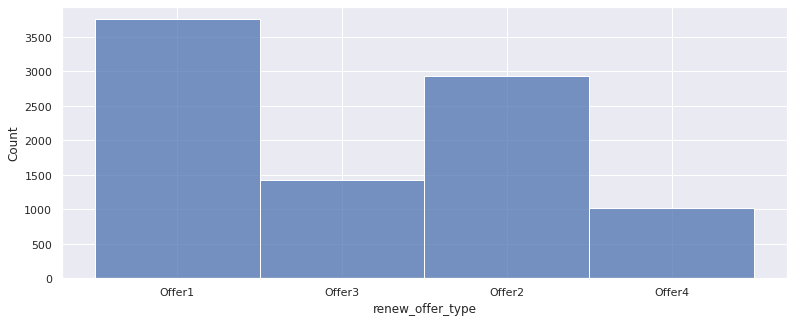

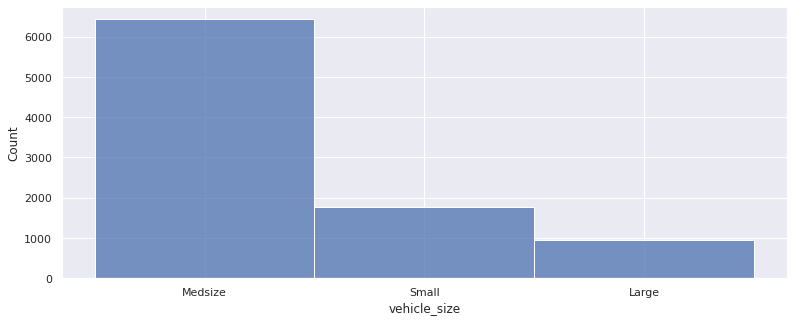

In [103]:
for col in categorical_df_num.columns:
    sns.histplot(categorical_df_num[col])
    plt.show()

In [104]:
# I see that effective to date is not categorical. Policy and Policy type are redundant

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [105]:
data_crosstab = pd.crosstab(categorical_df['policy_type'], categorical_df['policy'], margins = False)
data_crosstab

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [106]:
st.chi2_contingency(data_crosstab)

(18268.0,
 0.0,
 16,
 array([[  77.3496825 ,  128.19794176,  218.4751478 ,  267.16881979,
          457.20341581,  738.16159404,   14.22027589,   35.33523101,
           31.88789139],
        [ 266.79351872,  442.17867309,  753.56163784,  921.51521787,
         1576.98007445, 2546.05736808,   49.04839063,  121.87781914,
          109.9873002 ],
        [  14.85679877,   24.62338515,   41.96321436,   51.31596234,
           87.81650974,  141.78103788,    2.73133348,    6.78694986,
            6.12480841]]))

In [107]:
# the value is 0 < 0.05 we reject Ho = independent => they are NOT independent, we can drop one column

In [108]:
def Dependance_matrix(df):
    def Dependance_test(df,col1,col2,chi_val):
        data_crosstab = pd.crosstab(df[col1], df[col2], margins = False)
        if (st.chi2_contingency(data_crosstab)[1] < chi_val):
    #         print(col1, 'and', col2 , 'are DEPENDENT ', st.chi2_contingency(data_crosstab)[1])
            return np.round(st.chi2_contingency(data_crosstab)[1],2)
        else:
    #         print(col1, 'and', col2 , 'are INDEPENDENT ', st.chi2_contingency(data_crosstab)[1])
            return np.round(st.chi2_contingency(data_crosstab)[1],2)
    rows = []
    cols = []
    for col1 in df.columns:
        for col2 in df.columns:
            rows.append(Dependance_test(df,col1,col2,0.05))
        cols.append(rows)
        rows = []
    return pd.DataFrame(cols, columns = df.columns,index = df.columns)

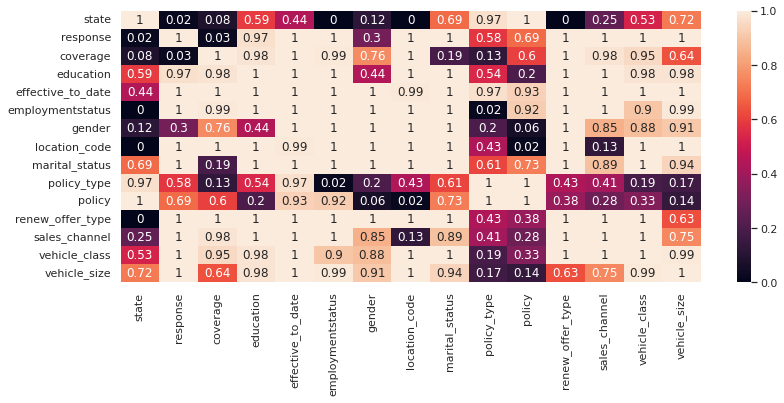

In [109]:
corr_jor = Dependance_matrix(categorical_df.drop(columns = ['customer']))
sns.heatmap(1 - corr_jor, annot=True) # I want to see it like the numerical, therefore i do 1-corr
plt.show()

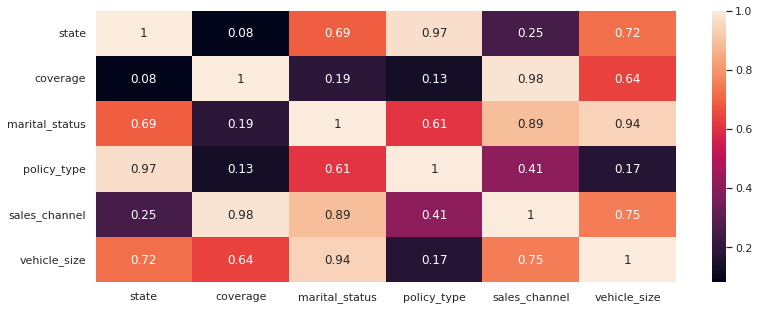

In [137]:
# If we drop high correlation columns we have:
cat = categorical_df.drop(columns = ['customer','effective_to_date','location_code','renew_offer_type','employmentstatus','vehicle_class','education','gender','response','policy'])
corr_jor = Dependance_matrix(cat)
sns.heatmap(1 - corr_jor, annot=True)
plt.show()

4. Plot time variable. Can you extract something from it?

In [114]:
from datetime import datetime
categorical_df2 = categorical_df.copy()
categorical_df2['effective_to_date'] = categorical_df2['effective_to_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
categorical_df2 = categorical_df2.sort_values(by="effective_to_date")

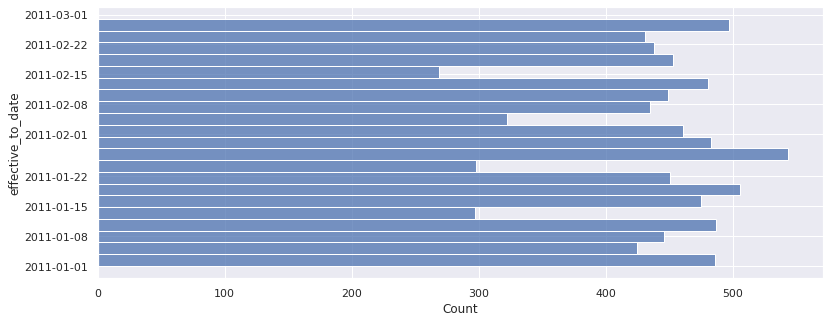

In [115]:
ax = sns.histplot(y = categorical_df2['effective_to_date'])

In [116]:
# 2 times per month the etd decreases considerably